In [68]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [69]:
import numpy as np
import pandas as pd
import datetime as dt

In [70]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [71]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [72]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [73]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [74]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [75]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [76]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [77]:
# Style of data we are getting: Stations
first_stations = session.query(Stations).first()
first_stations.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2a51f9b90f0>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716}

In [78]:
# Style of data we are getting: Stations
first_measurements = session.query(Measurements).first()
first_measurements.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2a51f9b9550>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [79]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
most_recent_date

('2017-08-23')

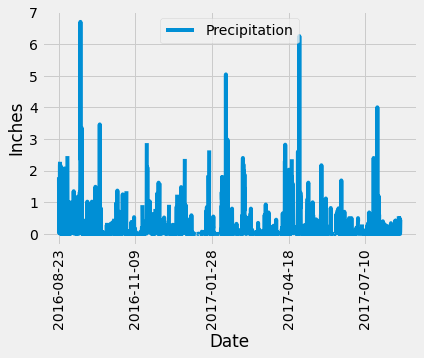

In [80]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
start_date = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
one_year_prev = start_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
date_prcp_data = session.query(Measurements.date, Measurements.prcp)\
    .filter(Measurements.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(date_prcp_data, columns=['Date', 'Prcp'])
prcp_df.set_index("Date", inplace=True,)
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='Date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.legend(['Precipitation'])
plt.grid(True)
plt.show()

In [81]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [82]:
# Design a query to calculate the total number stations in the dataset
number_of_stations = session.query(Stations).count()
number_of_stations

9

In [83]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurements.station, func.count(Measurements.station))\
    .group_by(Measurements.station)\
    .order_by(func.count(Measurements.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [84]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'
highest_temp = session.query(Measurements.station, func.max(Measurements.tobs))\
    .filter(Measurements.station == most_active_station_id).all();
print(f'Highest Temperature Recorded: {highest_temp}')

lowest_temp = session.query(Measurements.station, func.min(Measurements.tobs))\
    .filter(Measurements.station == most_active_station_id).all()
print(f'Lowest Temperature Recorded: {lowest_temp}')

avg_temp = session.query(Measurements.station, func.avg(Measurements.tobs))\
    .filter(Measurements.station == most_active_station_id).all()
print(f'Average Temperature Recorded: {avg_temp}')

Highest Temperature Recorded: [('USC00519281', 85.0)]
Lowest Temperature Recorded: [('USC00519281', 54.0)]
Average Temperature Recorded: [('USC00519281', 71.66378066378067)]


In [85]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_tobs_data = session.query(Measurements.date, Measurements.tobs)\
    .filter(Measurements.date >= '2016-08-23')\
    .filter(Measurements.station == 'USC00519281').all()

In [86]:
most_active_df = pd.DataFrame(most_active_station_tobs_data, columns=['Date', 'Tobs'])
most_active_df.set_index("Date", inplace=True,)
# Sort the dataframe by date
most_active_df = most_active_df.sort_values(by='Date', ascending=True)

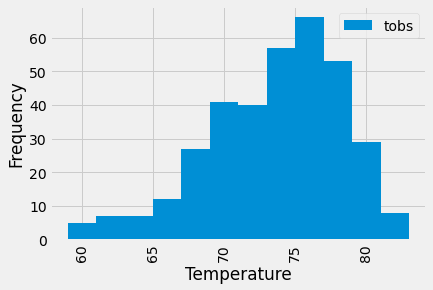

In [87]:
most_active_df.plot(kind='hist', bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.legend(['tobs'])
plt.grid(True)
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()